**Sanfrancisco Crime Analysis**

Adapted from Roshan Sharma


<img src="https://www.dea.gov/sites/default/files/styles/crop_paragraph_hero/public/2018-08/sanfran_copy.jpg?h=9e857dc9&itok=4vVW02qv" width="1000px">

**Importing some Basic Libraries**

In [61]:
#!pip install folium
# for some basic operations
# open a terminal and type:
#conda install -c conda-forge folium
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import folium




**Reading the Dataset**

In [19]:
# reading the dataset

data = pd.read_csv('../Data/sf_crime_incidents_cleandate.csv')

# check the shape of the data
data.shape


(30400, 14)

In [20]:
# checking the head of the data

data.head()

,incidnt_num,category,descript,day_of_week,date,time,pd_district,resolution,address,lon,lat,location,cleaned_date,id
0,140099416.0,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,Friday,01/31/2014 08:00:00 AM +0000,17:00,INGLESIDE,NONE,0 Block of GARRISON AV,-122.413624,37.709726,"(37.709725805163, -122.413623946206)",2014-01-31 17:00:00,1
1,140092426.0,ASSAULT,BATTERY,Friday,01/31/2014 08:00:00 AM +0000,17:45,TARAVAL,"ARREST, CITED",100 Block of FONT BL,-122.473706,37.715488,"(37.7154876086057, -122.47370623066)",2014-01-31 17:45:00,2
2,140092410.0,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Friday,01/31/2014 08:00:00 AM +0000,15:30,PARK,NONE,0 Block of CASTRO ST,-122.435719,37.768689,"(37.7686887134351, -122.435718550322)",2014-01-31 15:30:00,3
3,140092341.0,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Friday,01/31/2014 08:00:00 AM +0000,17:50,CENTRAL,"ARREST, CITED",JEFFERSON ST / POWELL ST,-122.412527,37.808625,"(37.8086250595467, -122.412527239682)",2014-01-31 17:50:00,4
4,140092573.0,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Friday,01/31/2014 08:00:00 AM +0000,19:20,SOUTHERN,"ARREST, BOOKED",0 Block of GRACE ST,-122.414634,37.775081,"(37.7750814399634, -122.414633686589)",2014-01-31 19:20:00,5


In [21]:
# describing the data

data.describe()

,incidnt_num,lon,lat,id
count,3.040000e+04,30400.000000,30400.000000,30400.000000
mean,1.353141e+08,-122.422494,37.768507,15200.500000
std,8.543938e+06,0.024781,0.023565,8775.868428
min,1.007335e+07,-122.512539,37.708154,1.000000
25%,1.310064e+08,-122.432916,37.756141,7600.750000
50%,1.310916e+08,-122.416294,37.775232,15200.500000
75%,1.400383e+08,-122.406663,37.784777,22800.250000
max,9.610181e+08,-122.370741,37.817772,30400.000000


In [22]:
# checking if there are any null values

data.isnull().sum()

incidnt_num     0
category        0
descript        3
day_of_week     0
date            0
time            0
pd_district     0
resolution      0
address         0
lon             0
lat             0
location        0
cleaned_date    0
id              0
dtype: int64

In [27]:
# filling the missing value in PdDistrict using the mode values

#data['pd_district'].fillna(data['pd_district'].mode()[0], inplace = True) #data['pd_district'].mode() returns a series object. To access it's first value, you'd need to include .iloc[0] during the fillna operation. 

data['descript'].fillna(data['descript'].mode()[0],inplace = True)
#data.isnull().sum()

data.isnull().any().any()
#data['pd_district'].isnull().any()

False

## Data Visualization

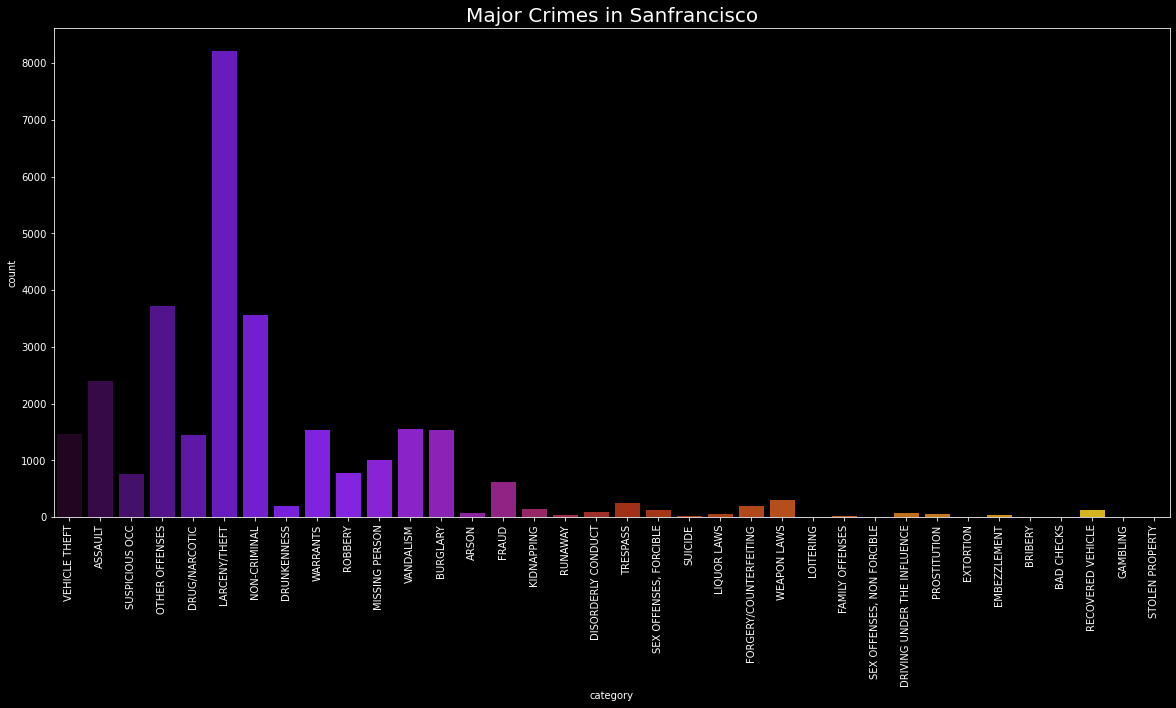

In [31]:
# different categories of crime

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(data['category'], palette = 'gnuplot')
plt.title('Major Crimes in Sanfrancisco', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

**Description of the Crime**

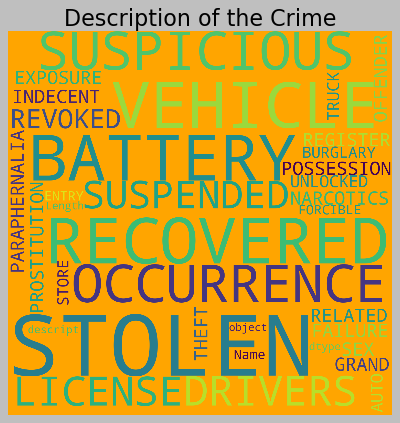

In [42]:
# description of the crime
#!pip install wordcloud 
#open a terminal and type the following:
#conda install -c https://conda.anaconda.org/conda-forge wordcloud

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('classic')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(data['descript']))
plt.title('Description of the Crime', fontsize = 20)
plt.imshow(wc)
plt.axis('off')
plt.show()

**District with Most Crime**

In [43]:
data['pd_district'].value_counts()

SOUTHERN      5890
MISSION       4098
NORTHERN      3808
CENTRAL       3219
BAYVIEW       2839
TENDERLOIN    2560
INGLESIDE     2559
TARAVAL       2019
RICHMOND      1718
PARK          1690
Name: pd_district, dtype: int64

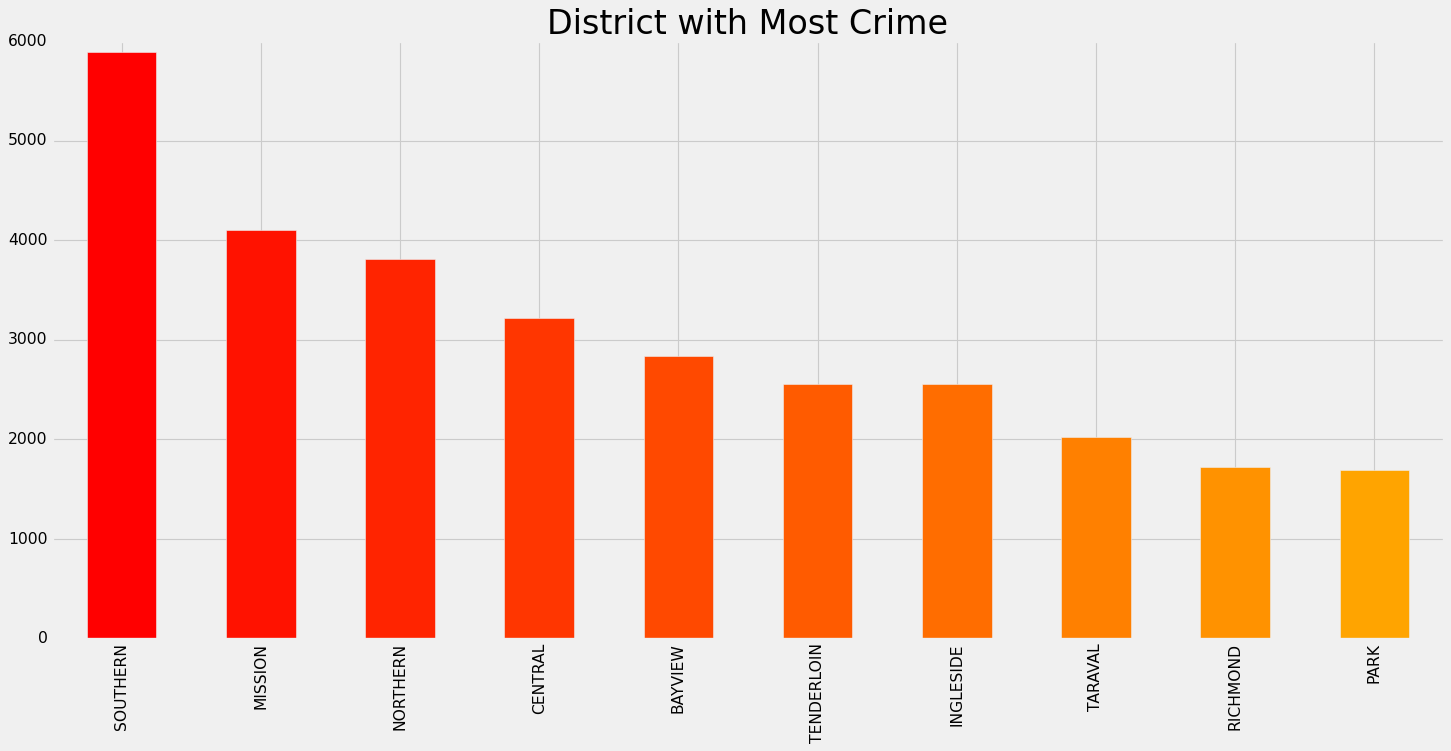

In [44]:
# Regions with count of crimes

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('fivethirtyeight')

color = plt.cm.autumn(np.linspace(0, 1, 15))
data['pd_district'].value_counts().plot.bar(color = color)

plt.title('District with Most Crime',fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

**Top 15 Addresses in Sanfrancisco in Crime**

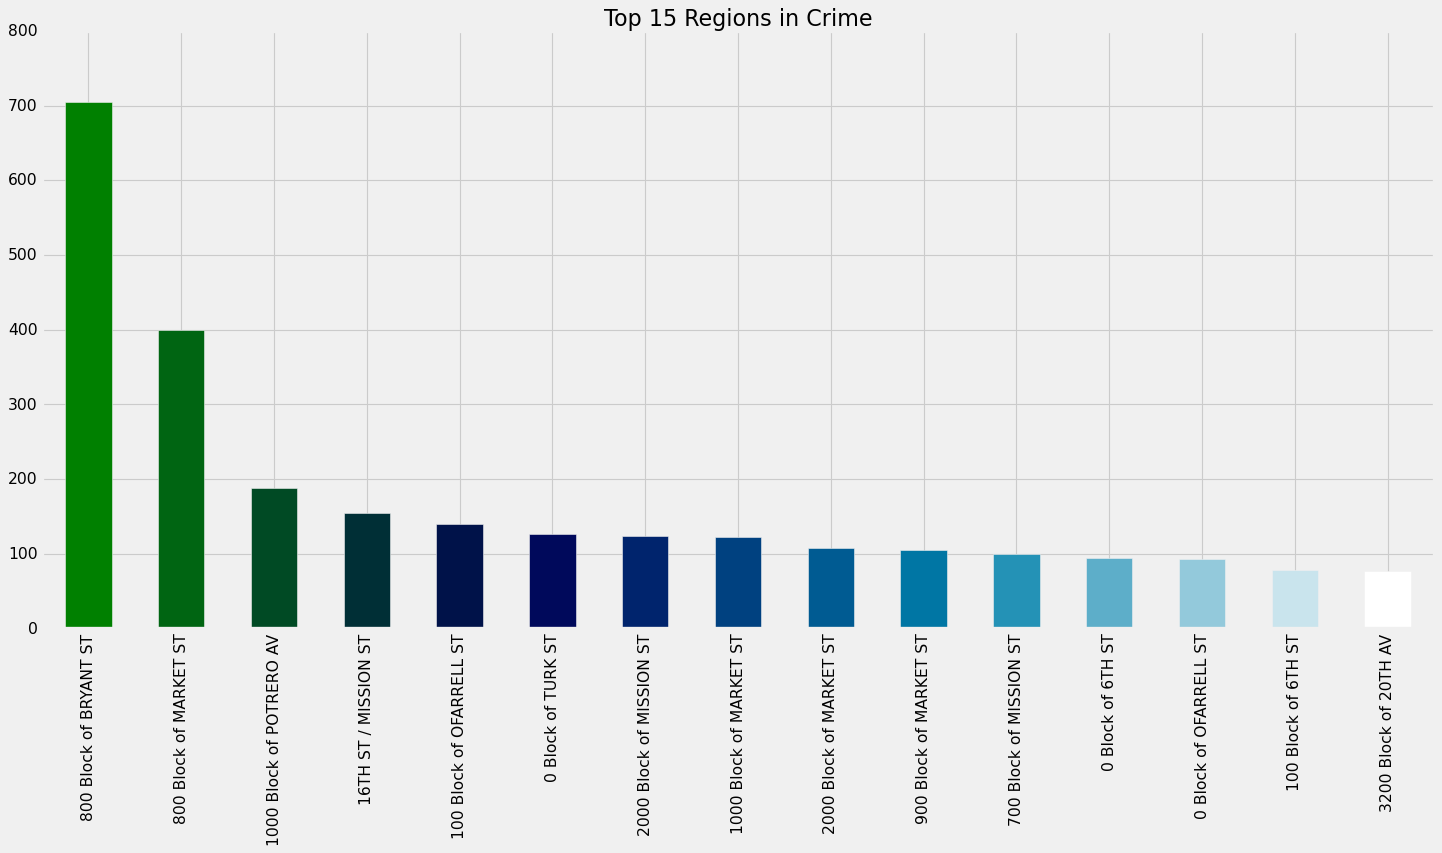

In [45]:
# Regions with count of crimes

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('fivethirtyeight')

color = plt.cm.ocean(np.linspace(0, 1, 15))
data['address'].value_counts().head(15).plot.bar(color = color)

plt.title('Top 15 Regions in Crime',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

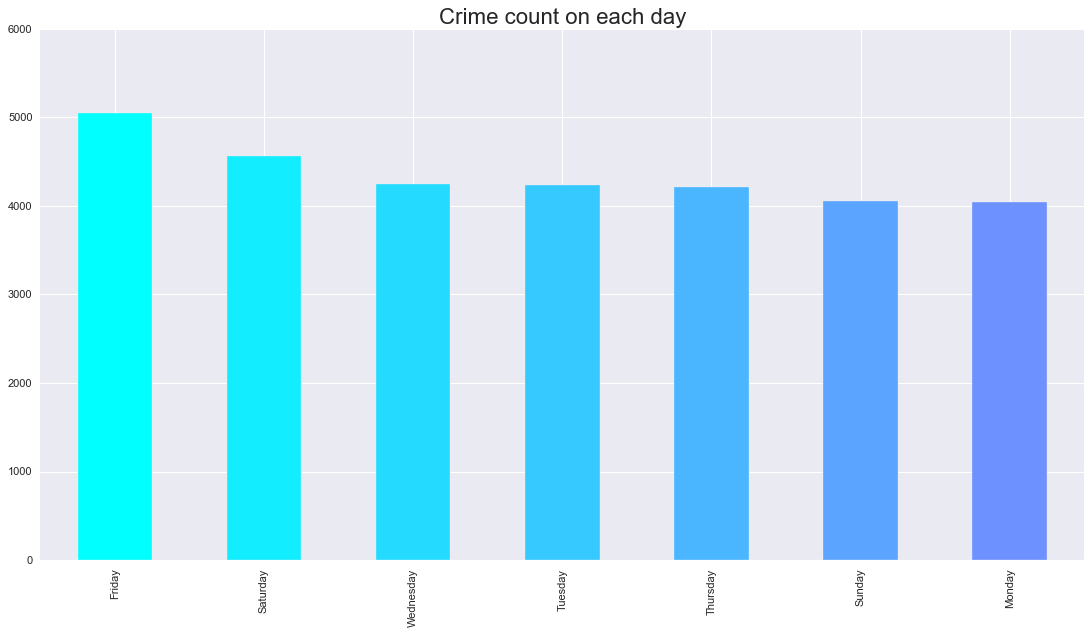

In [46]:
# Regions with count of crimes

plt.style.use('seaborn')

color = plt.cm.cool(np.linspace(0, 1, 15))
data['day_of_week'].value_counts().head(15).plot.bar(color = color, figsize = (15, 8))

plt.title('Crime count on each day',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

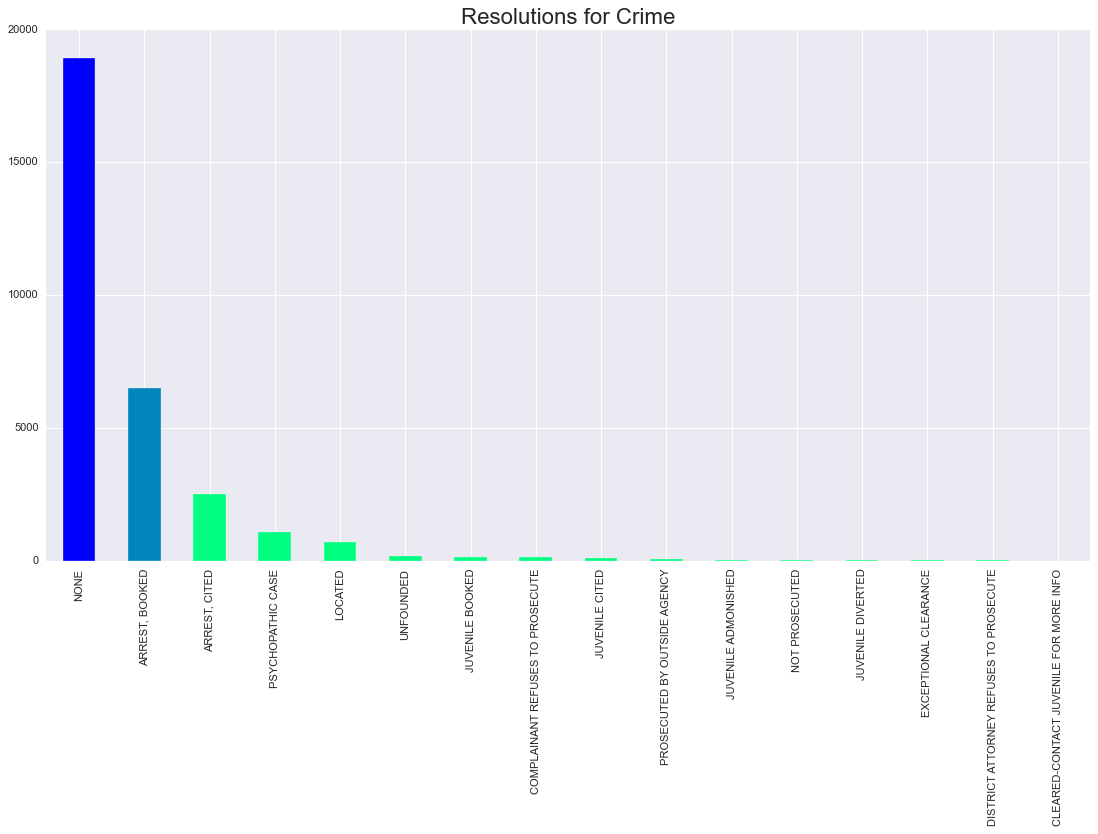

In [47]:
# Regions with count of crimes

plt.style.use('seaborn')

color = plt.cm.winter(np.linspace(0, 10, 20))
data['resolution'].value_counts().plot.bar(color = color, figsize = (15, 8))

plt.title('Resolutions for Crime',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

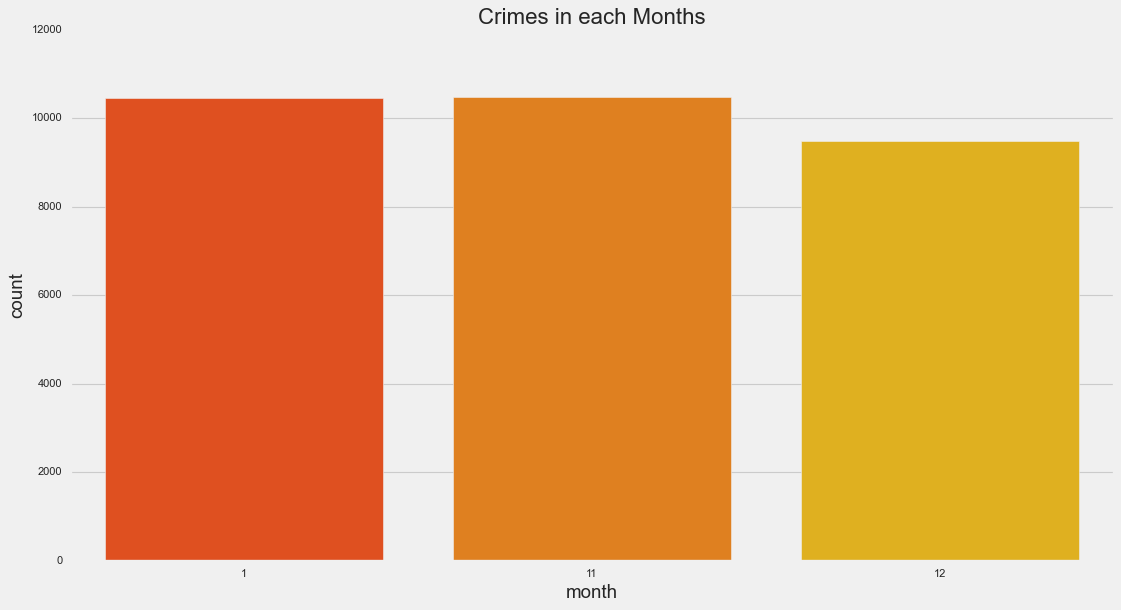

In [48]:
data['date'] = pd.to_datetime(data['date'])

data['month'] = data['date'].dt.month

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['month'], palette = 'autumn',)
plt.title('Crimes in each Months', fontsize = 20)
plt.show()

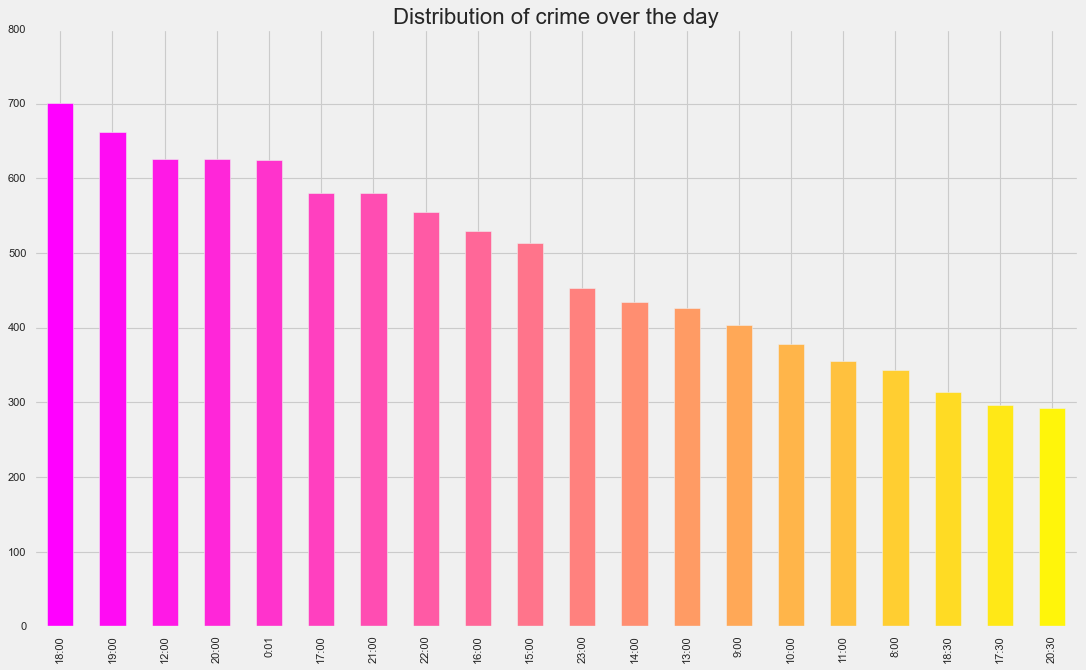

In [49]:
# checking the time at which crime occurs mostly

import warnings
warnings.filterwarnings('ignore')

color = plt.cm.spring(np.linspace(0, 5, 100))
data['time'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()

In [50]:
pd.crosstab(data['category'], data['pd_district'])

pd_district,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
category,,,,,,,,,,
ARSON,8,6,1,13,8,4,5,5,8,5
ASSAULT,287,227,268,364,259,76,87,410,172,249
BAD CHECKS,0,0,0,0,2,0,1,0,1,0
BRIBERY,0,0,0,0,0,0,0,0,0,1
BURGLARY,131,203,119,154,254,116,143,213,135,73
DISORDERLY CONDUCT,10,10,1,38,3,7,2,10,1,5
DRIVING UNDER THE INFLUENCE,12,2,8,15,5,4,2,16,3,7
DRUG/NARCOTIC,114,82,83,232,127,106,35,272,33,368
DRUNKENNESS,16,11,8,38,10,9,6,52,9,37


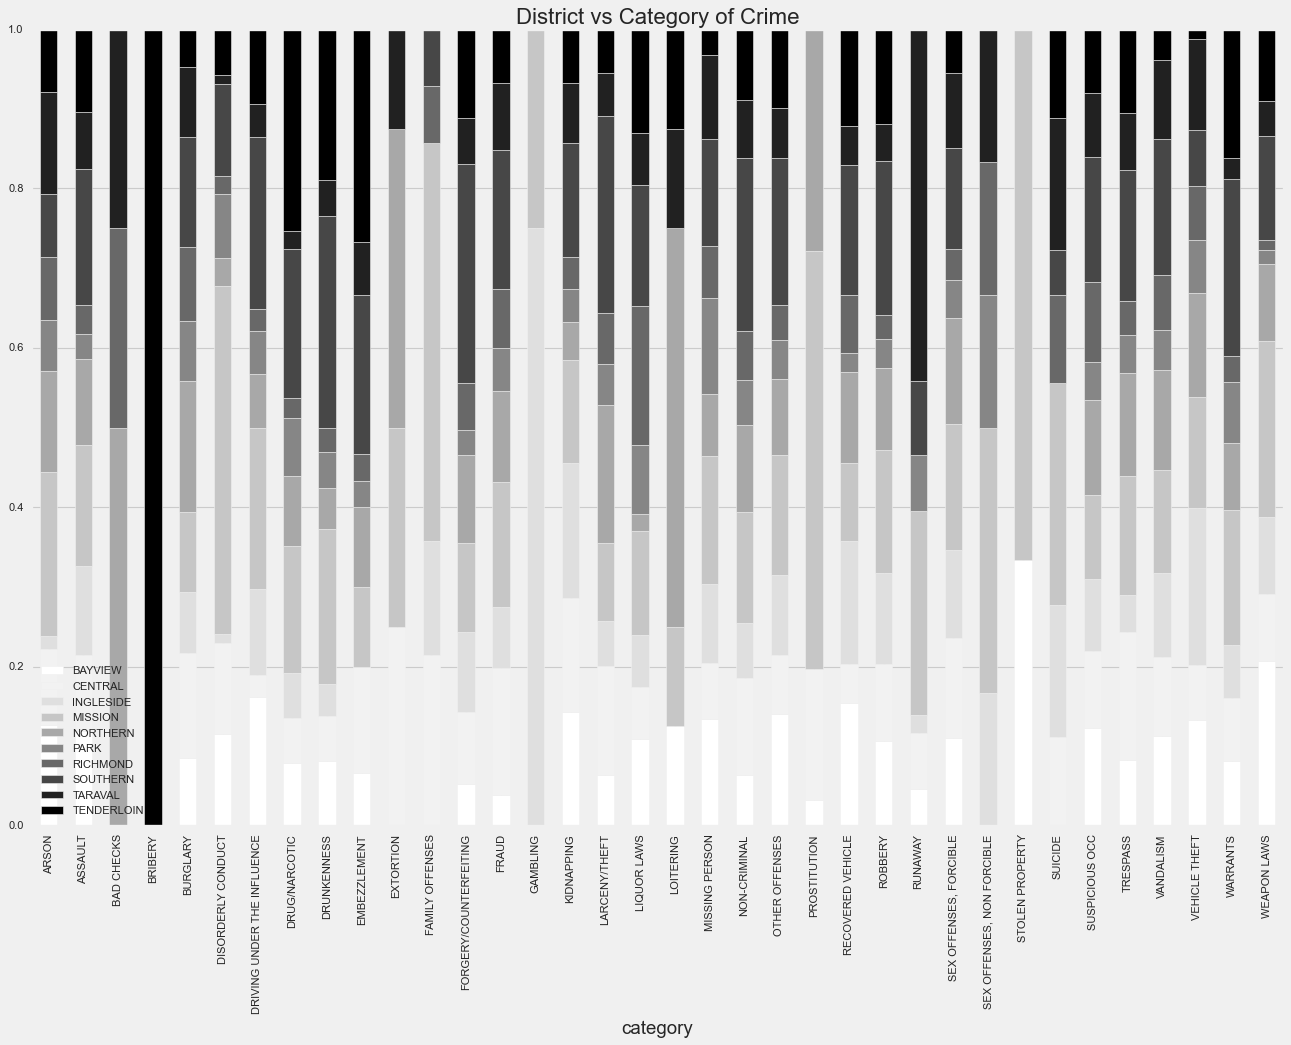

In [52]:

df = pd.crosstab(data['category'], data['pd_district'])
color = plt.cm.Greys(np.linspace(0, 1, 10))
df.div(df.sum(1).astype(float), axis = 0).plot.bar(stacked = True, color = color, figsize = (18, 12))
plt.title('District vs Category of Crime', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.legend(loc = 'best')
plt.show()

## Geospatial Visualization

In [57]:
t = data.pd_district.value_counts()
table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
table = table.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"]) #With reindex, the order of rows are changed accordingly to the shuffle of index column
table = table.reset_index()
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)
table

,Neighborhood,Count
0,CENTRAL,3219
1,NORTHERN,3808
2,PARK,1690
3,SOUTHERN,5890
4,MISSION,4098
5,TENDERLOIN,2560
6,RICHMOND,1718
7,TARAVAL,2019
8,INGLESIDE,2559
9,BAYVIEW,2839


To create a base map, simply pass your starting coordinates to Folium:
https://python-visualization.github.io/folium/quickstart.html#GeoJSON/TopoJSON-Overlays

In [62]:
m = folium.Map(location=[45.5236, -122.6750])
m

In [63]:
gjson = r'https://cocl.us/sanfran_geojson'
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)
sf_map

**Density of crime in Sanfrancisco**

In [64]:
#generate map
sf_map.choropleth(
    geo_data=gjson,
    data=table,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)
sf_map